In [1]:
import numpy as np
import graphinglib as gl
from astropy.io import fits

from src.hdu.map import Map
from src.hdu.header import Header

### Fig 1

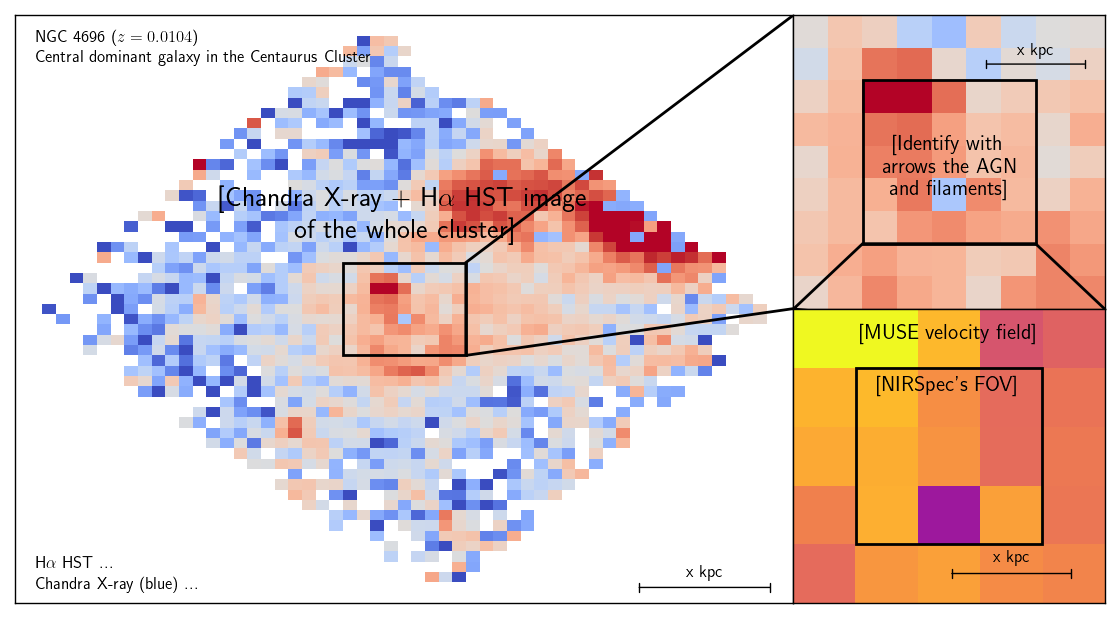

In [54]:
data = fits.open(
    "data/output_NGC4696_G235H_F170LP_full_model/NGC4696_G235H_F170LP_full_model_parameter_maps.fits"
)[67].data  # H_2(1-0)
hm = gl.Heatmap(data, origin_position="lower", show_color_bar=False, color_map_range=(-18, -16))
zoomed_hm = gl.Heatmap(data[24:33,24:33], origin_position="lower", show_color_bar=False, color_map_range=(-18, -16))
zoomed_hm_2 = zoomed_hm.copy()
zoomed_hm_2.image = zoomed_hm.image[2:7,2:7]
zoomed_hm_2.color_map = "plasma"

fig = gl.SmartFigure(
    2,
    2,
    remove_x_ticks=True,
    remove_y_ticks=True,
    size=(11, 6),
    width_ratios=[5, 2],
    reference_labels=False,
    width_padding=0,
    height_padding=0,
).set_visual_params(use_latex=True)
fig[:, 0] = [
    hm,
    gl.Text(1, 54, "NGC 4696 ($z=0.0104$)", h_align="left"),
    gl.Text(1, 52, "Central dominant galaxy in the Centaurus Cluster", h_align="left"),
    gl.Text(1, 3, r"H$\alpha$ HST ...", h_align="left"),
    gl.Text(1, 1, r"Chandra X-ray (blue) ...", h_align="left"),
    gl.Text(28, 35, r"[Chandra X-ray + H$\alpha$ HST image"+"\nof the whole cluster]", font_size=20),
    gl.Line((45, 1), (55, 1), capped_line=True, cap_width=0.5, width=1),
    gl.Text(50, 2, "x kpc"),
    gl.Rectangle(23.5, 23.5, 9, 9, fill=False),
    gl.Polygon([[9+23.5, 23.5], [9+23.5, 9+23.5], [60, 60], [60, 28.7]], fill=False),
]
fig[0, 1] = [
    zoomed_hm,
    gl.Text(4, 3, "[Identify with\narrows the AGN\nand filaments]", font_size=15),
    gl.Text(6.5, 7.3, "x kpc"),
    gl.Line((5, 7), (8, 7), capped_line=True, cap_width=0.5, width=1),
    gl.Rectangle(1.5, 1.5, 5, 5, fill=False),
    gl.Polygon([[-0.5, -0.5], [1.5, 1.5], [6.5, 1.5], [9.5, -1.5]], fill=False),
]
fig[1, 1] = [
    zoomed_hm_2,
    gl.Rectangle(0.5, 0.5, 3, 3, fill=False),
    gl.Text(2, 4, "[MUSE velocity field]", font_size=15),
    gl.Text(2, 3.1, "[NIRSpec's FOV]", font_size=15),
    gl.Line((2, 0), (4, 0), capped_line=True, cap_width=0.5, width=1),
    gl.Text(3, 0.2, "x kpc"),
]
fig.show().save("figures/article/fig_1.pdf", dpi=600)

### Fig 2

In [2]:
data = fits.open("data/output_NGC4696_G235H_F170LP_full_model/NGC4696_G235H_F170LP_full_model_parameter_maps.fits")
maps = []
for hdu_i in [177, 28, 29]:  # flux, vel, sig
    hdu = data[hdu_i]
    map_ = Map(data=hdu.data, header=Header(hdu.header)).rotate_field()
    maps.append(map_)

flux_hm = gl.Heatmap(maps[0].data, origin_position="lower", color_map_range=(-18.6, -17), color_map="plasma",
                     show_color_bar=True)
flux_hm.set_color_bar_params(label=r"$\log_{10}(F/$ erg s$^{-1}$ cm$^{-2})$", position="bottom")
vel_hm = gl.Heatmap(maps[1].data, origin_position="lower", color_map_range=(-450, 450), color_map="coolwarm",
                    show_color_bar=True)
vel_hm.set_color_bar_params(label="$v$ (km s$^{-1}$)", position="bottom")
sig_hm = gl.Heatmap(maps[2].data, origin_position="lower", color_map_range=(0, 800), color_map="magma",
                    show_color_bar=True)
sig_hm.set_color_bar_params(label=r"$\sigma$ (km s$^{-1}$)", position="bottom")
vel_hm_0 = vel_hm.copy()
vel_hm_0.show_color_bar = False
sig_hm_0 = sig_hm.copy()
sig_hm_0.show_color_bar = False

arrows = [
    gl.Arrow((7, 2), (12, 7), "lime"),
    gl.Arrow((7, 2), (2, 7), "lime"),
    gl.Text(12, 7, "N", color="lime", font_size=15, h_align="center", v_align="bottom"),
    gl.Text(2, 7, "E", color="lime", font_size=15, h_align="center", v_align="bottom"),
]
# "[Identify on each plot the BH with a\ncross and superimpose contours of\nthe radio jets]"
# fig = gl.SmartFigure(
#     2,
#     3,
#     aspect_ratio=1,
#     size=(10, 6),
#     remove_x_ticks=True,
#     remove_y_ticks=True,
#     # subtitles=["Flux", "Velocity", "Velocity Dispersion"] + [None]*3,
#     elements=[flux_hm, vel_hm, sig_hm] + [flux_hm, vel_hm.copy(), sig_hm.copy()],
#     reference_label_loc="inside",
#     height_ratios=[5, 6.4]
# ).add_elements(*[arrows]*6)
# fig[0, 1][0].show_color_bar = False
# fig[0, 2][0].show_color_bar = False
# fig.set_visual_params(use_latex=True).show()#.save("figures/article/fig_2.pdf", dpi=600)

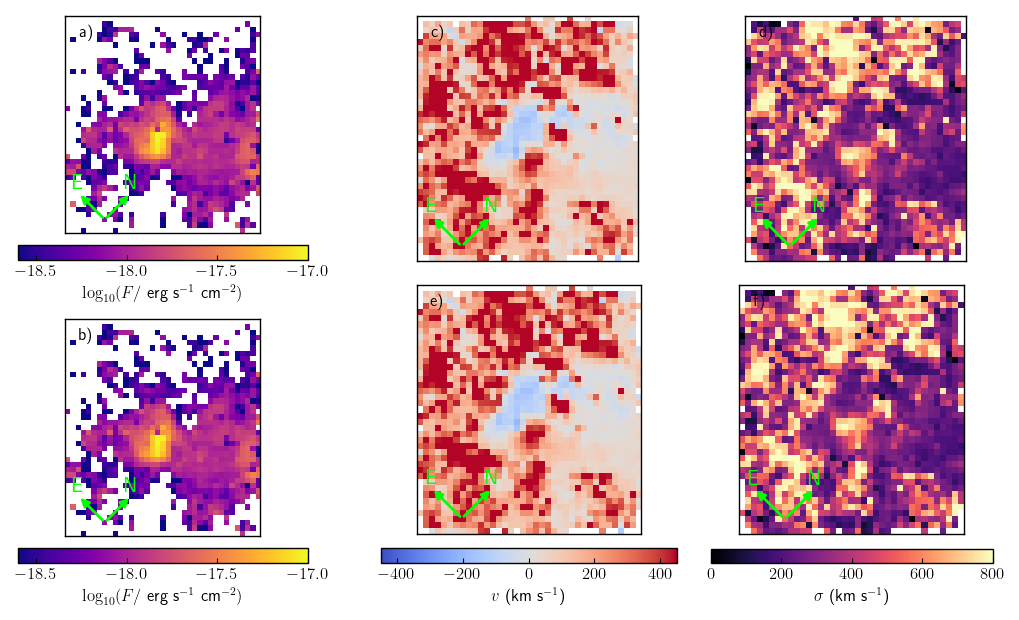

In [ ]:
left_fig = gl.SmartFigure(
    2,
    1,
    aspect_ratio=1,
    remove_x_ticks=True,
    remove_y_ticks=True,
    elements=[flux_hm, flux_hm],
    reference_label_loc="inside",
).add_elements(*[arrows]*2)
middle_right_fig = gl.SmartFigure(
    2,
    2,
    aspect_ratio=1,
    remove_x_ticks=True,
    remove_y_ticks=True,
    elements=[vel_hm_0, sig_hm_0, vel_hm, sig_hm],
    reference_label_loc="inside",
    height_ratios=[5, 6.5]
).add_elements(*[arrows]*4)
global_fig = gl.SmartFigure(
    1,
    2,
    size=(10, 6),
    elements=[left_fig, middle_right_fig],
    width_ratios=[1, 2],
).set_visual_params(use_latex=True).show()#.save("figures/article/fig_2.pdf", dpi=600)